In [1]:
import sys
sys.dont_write_bytecode = True
print("Set __pycache__ disabled.")

from preprocessing import *
from time import sleep
from os import listdir
import numpy as np
import matplotlib.pyplot as plt

#from keras.api.models import Sequential
#from keras.api.layers import Flatten, Dense
#from keras.api.optimizers import Adagrad
#from keras.api.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Flatten, Dense, LSTM, Dropout, Embedding  # type: ignore
from tensorflow.keras.regularizers import L2  # type: ignore
from tensorflow.keras import optimizers  # type: ignore
from tensorflow.keras.utils import to_categorical  # type: ignore

gpus = tf.config.list_physical_devices('GPU')
print("GPUs detected: ",gpus)
print("Successfully imported.")

Set __pycache__ disabled.


2025-02-09 17:06:08.646279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-09 17:06:08.659090: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-09 17:06:08.662924: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 17:06:08.673572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-09 17:06:09.359147: W tensorflow/compiler/tf2

GPUs detected:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Successfully imported.


I0000 00:00:1739109970.142973    5852 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739109970.261731    5852 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739109970.263307    5852 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [2]:
import os
os.system("pwd")
os.system(command="python3 preprocessing.py")

/home/yegekucuk/Documents/Projects/short-story-generator
Set __pycache__ disabled.
Library loaded
Number of stories used: 41
0.txt done.
1.txt done.
2.txt done.
3.txt done.
4.txt done.
5.txt done.
6.txt done.
7.txt done.
8.txt done.
9.txt done.
10.txt done.
11.txt done.
12.txt done.
13.txt done.
14.txt done.
15.txt done.
16.txt done.
17.txt done.
18.txt done.
19.txt done.
20.txt done.
21.txt done.
22.txt done.
23.txt done.
24.txt done.
25.txt done.
26.txt done.
27.txt done.
28.txt done.
29.txt done.
30.txt done.
31.txt done.
32.txt done.
33.txt done.
34.txt done.
35.txt done.
36.txt done.
37.txt done.
38.txt done.
39.txt done.
40.txt done.
Successfully created the file in dictionary/dictionary.txt


0

In [3]:
# Loading the dictionary
dictionary_list = load_dictionary()

Dictionary is loaded successfully.


In [4]:
# Creating stories[][]
scripts = []

for j in range(NUM_STORIES):
    with open(f"./dataset-encrypted/{j}.txt","r") as file:
        scripts.append(list(map(int,list(file.read().splitlines()))))
        file.close()

# Turning int to [int]
def func(liste):
    return [[x] for x in liste]
scripts = list(map(func,scripts))

print(scripts)

[[[889], [337], [46], [914], [208], [73], [0], [473], [808], [676], [1343], [84], [155], [1272], [676], [883], [881], [1523], [274], [591], [699], [676], [918], [617], [313], [936], [1346], [591], [899], [1222], [910], [1502], [591], [1253], [73], [1321], [208], [824], [458], [1163], [759], [591], [1479], [1071], [1323], [920], [289], [591], [1396], [1321], [208], [582], [32], [1321], [1490], [83], [1286], [591], [1479], [0], [189], [19], [1251], [648], [617], [914], [1110], [73], [469], [676], [1479], [520], [155], [591], [840], [1321], [966], [591], [277], [830], [1195], [1324], [1049], [1321], [957], [1479], [94], [155], [1321], [523], [811], [854], [591], [1158], [1321], [208], [502], [889], [1096], [1352], [1321], [1008], [188], [131], [1503], [591], [277], [101], [49], [1503], [591], [1479], [549]], [[807], [576], [44], [101], [450], [156], [839], [155], [1166], [576], [883], [643], [1320], [920], [253], [183], [1321], [258], [911], [607], [752], [1502], [1166], [503], [46], [914

In [5]:
# To categorical -> [0,0,0,...,1,...0,0,0]
for j in range(NUM_STORIES):
    scripts[j] = to_categorical(scripts[j],num_classes=len(dictionary_list))

print(scripts)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0.

In [6]:
# Creating inputs and outputs lists
inputs = []
outputs = []
for j in range(NUM_STORIES):
    inputs.append(None)
    outputs.append(None)

# Creating sublists
for j in range(NUM_STORIES):
    inputs[j],outputs[j] = create_sublists(scripts[j], WINDOW_SIZE)

# Removing [stories] layer in lists aka. flattening
# [[1],[2],[3]] -> [1,2,3]
inputs_temp = []
for j in range(NUM_STORIES):
    for k in range(len(inputs[j])):
        inputs_temp.append(inputs[j][k])
inputs = inputs_temp
del inputs_temp

outputs_temp = []
for j in range(NUM_STORIES):
    for k in range(len(outputs[j])):
        outputs_temp.append(outputs[j][k])
outputs = outputs_temp
del outputs_temp

x_train = np.asarray(inputs)
y_train = np.asarray(outputs)

In [7]:
# # Creating train data and test data, x is for input and y is for output
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=42)
# 
# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)
# x_test = np.asarray(x_test)
# y_test = np.asarray(y_test)

In [8]:
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Unique samples ratio: {len(np.unique(x_train, axis=0))/len(x_train):.2f}")

Training data shape: (8553, 5, 1568), (8553, 1568)
Unique samples ratio: 0.98


In [9]:
# Creating model (ANN)
model=Sequential([
    #Flatten(input_shape=(WINDOW_SIZE, len(dictionary_list))),
    LSTM(64, input_shape=(WINDOW_SIZE, len(dictionary_list))),
    Dense(len(dictionary_list), activation="softmax")
])

# Showing properties
model.summary()

# Setting the optimizer algorithm and compiling the model
opt = optimizers.Adam(learning_rate = 0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("Model is optimized")

I0000 00:00:1739109974.165732    5852 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739109974.167208    5852 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739109974.168568    5852 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739109974.287502    5852 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │       418,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1568)           │       101,920 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 519,968 (1.98 MB)

 Trainable params: 519,968 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

Model is optimized


In [10]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10


2025-02-09 17:06:16.711502: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


428/428 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0615 - loss: 6.3618 - val_accuracy: 0.0982 - val_loss: 5.9926
Epoch 2/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1252 - loss: 5.2937 - val_accuracy: 0.1525 - val_loss: 5.6527
Epoch 3/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2253 - loss: 4.1968 - val_accuracy: 0.1718 - val_loss: 5.7441
Epoch 4/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3555 - loss: 3.0868 - val_accuracy: 0.1683 - val_loss: 6.1316
Epoch 5/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5440 - loss: 1.9931 - val_accuracy: 0.1823 - val_loss: 6.5503
Epoch 6/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7517 - loss: 1.0759 - val_accuracy: 0.1742 - val_loss: 7.2384
Epoch 7/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8868 - loss: 0.5343 - val_accuracy: 0.1707 - val_loss: 7.9144
Epoch 8/10
428/428 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9577 - loss: 0.2465 - val_accuracy: 0.1607 - val_

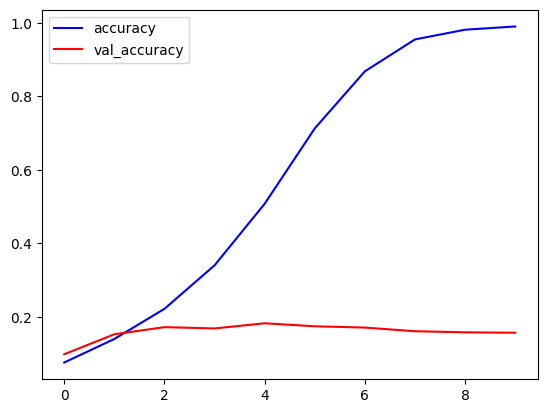

The train accuracy: 0.989915


In [11]:
import plotter
plotter.create_plot_keras(history, metric="accuracy" , validation=True)
#plotter.create_plot_keras(history, metric="loss" , validation=True)
print("The train accuracy: %f" %(history.history["accuracy"][-1]))

In [12]:
model.save("model.keras")

In [14]:
# Garbage collector
os.system("rm -rf dataset-encrypted")

0